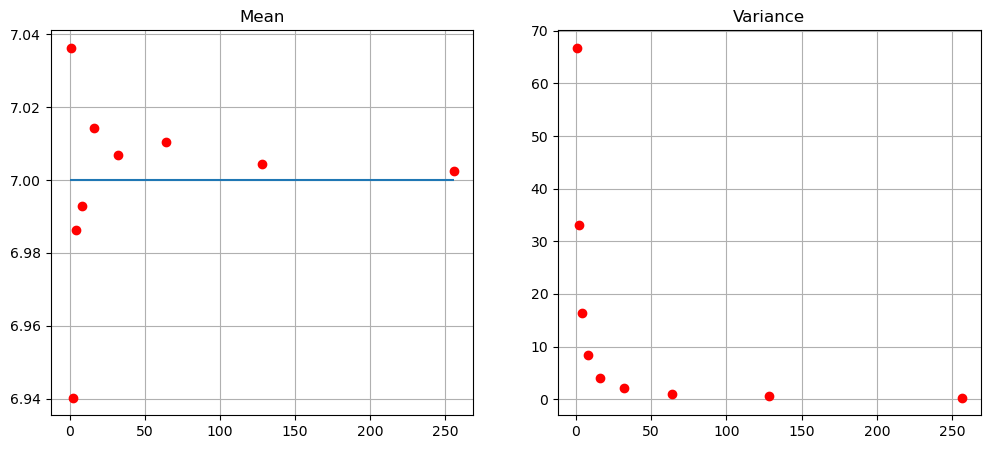

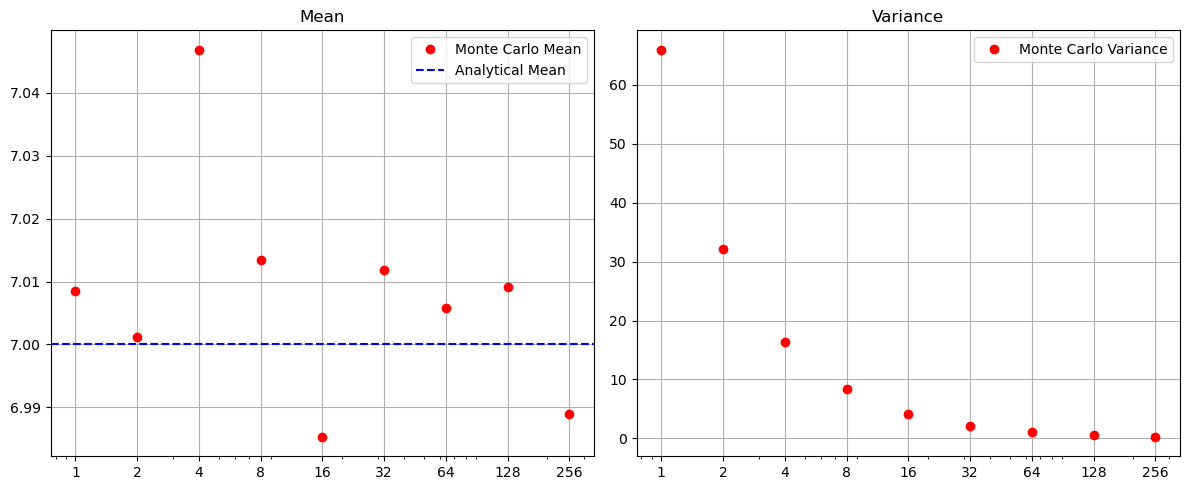

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def eval_MC_mean(M, N):
    # Scale is standard deviation (sqrt of variance)
    x = np.random.normal(1, np.sqrt(3), (M, N))
    f_M = (1 + 2*x + x**2).mean(axis=0)
    return f_M  # Output (N,) array


# Simulate for M = 2^0 to 2^8
tmp = []
for i in range(9):
    M = 2**i
    tmp.append(eval_MC_mean(M, 10000))
result = np.array(tmp)
mean = result.mean(axis=1)
var = result.var(axis=1)  # Uses unbiased variance (ddof=1 for sample variance)

# Plotting
M = [2**i for i in range(9)]
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Mean plot
ax1.plot(M, mean, 'ro', label='Monte Carlo Mean')
# Improved horizontal line
ax1.axhline(7, color='b', linestyle='--', label='Analytical Mean')
ax1.set_xscale('log')  # Better visualization for exponential M
ax1.set_xticks(M)
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Show actual M values
ax1.grid()
ax1.set_title("Mean")
ax1.legend()

# Variance plot
ax2.plot(M, var, 'ro', label='Monte Carlo Variance')
ax2.set_xscale('log')
ax2.set_xticks(M)
ax2.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax2.grid()
ax2.set_title("Variance")
ax2.legend()

plt.tight_layout()
plt.show()